In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/home/nguyen451/Small-Disaster-Tracker/disasters_2.csv")

In [4]:
df.drop_duplicates(inplace=True)
df.drop(columns=["disaster_level"], inplace=True) # "kv_anhhuong", 
df.dropna(subset=["name"], inplace=True)

In [5]:
for col in ["type", "level"]:
    df[col] = df[col].astype("category")

df["time_start"] = pd.to_datetime(df["time_start"]).dt.date
df["name"] = df["name"].str.strip()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2030 entries, 0 to 2457
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         2030 non-null   object  
 1   kv_anhhuong  2030 non-null   object  
 2   time_start   2030 non-null   object  
 3   lon          2030 non-null   float64 
 4   lat          2030 non-null   float64 
 5   level        2030 non-null   category
 6   type         2030 non-null   category
dtypes: category(2), float64(2), object(3)
memory usage: 100.5+ KB


In [6]:
df["type"].unique()

['Động đất', 'Sạt lở đất', 'Sét', 'Mưa lớn', 'Lốc', ..., 'Áp thấp nhiệt đới', 'Bão', 'Nước dâng', 'Cháy rừng do tự nhiên', 'Hạn hán']
Length: 19
Categories (19, object): ['Bão', 'Cháy rừng do tự nhiên', 'Dông lốc, sét, mưa đá', 'Gió mạnh trên biển', ..., 'Sạt lở đất', 'Sụt lún đất', 'Áp thấp nhiệt đới', 'Động đất']

In [7]:
df.head()

,name,kv_anhhuong,time_start,lon,lat,level,type
0,Động đất tại Kon Tum,Xã Ngọk Tem - huyện Kon Plông - tỉnh Kon Tum,2022-04-28,108.315000,14.824000,0,Động đất
1,Sạt lở đất tại Cà Mau,Ấp Xóm Tắc - xã Tân Thuận - huyện Đầm Dơi - tỉ...,2022-06-19,105.370478,9.017483,0,Sạt lở đất
2,Sét tại Điện Biên,Xã Sính Phình - huyện Tủa Chùa - tỉnh Điện Biên,2022-05-08,103.310010,21.873815,0,Sét
3,Động đất tại Kon Tum,"Xã Đăk Ring, Huyện Kon Plông, tỉnh Kon Tum",2022-03-09,108.259000,14.879000,0,Động đất
4,Động đất tại Kon Tum,"Xã Đăk Ring, Huyện Kon Plông, tỉnh Kon Tum",2022-03-09,108.259000,14.873000,0,Động đất


In [8]:
hazard = df[df["level"] != 0]
hazard

,name,kv_anhhuong,time_start,lon,lat,level,type
411,ATNĐ trên biển Đông,Phía Nam tỉnh Quảng Đông (Trung Quốc),2022-08-04,114.1,23.2,6,Áp thấp nhiệt đới
461,CƠN BÃO SỐ 3,Khu vực Đông Bắc của Bắc Bộ,2022-08-22,106.5,21.8,10,Bão
462,CƠN BÃO SỐ 2,"Quảng Ninh, Hải Phòng",2022-08-07,106.3,21.6,8,Bão
463,CƠN BÃO SỐ 1,Biển Đông,2022-06-28,110.4,23.1,11,Bão
533,Áp thấp nhiệt đới,Biển Đông,2022-10-21,115.7,19.7,7,Áp thấp nhiệt đới
534,CƠN BÃO SỐ 4,Biển Đông,2022-09-24,105.8,15.9,15,Bão
551,CƠN BÃO SỐ 5,"Quảng Nam, Quảng Ngãi",2022-10-12,108.3,15.2,9,Bão
552,CƠN BÃO SỐ 6,vùng biển Quảng Bình đến Thừa Thiên Huế,2022-10-15,108.2,17.4,12,Bão
573,CƠN BÃO SỐ 7,Vùng biển phía Nam tỉnh Quảng Đông (Trung...,2022-10-28,112.8,22.5,10,Bão
679,ATNĐ (Suy yếu từ Bão JELAWAT),Biển Đông,2023-12-17,111.5,7.5,8,Áp thấp nhiệt đới


In [9]:
# this work but take so long

# from geopy.geocoders import Nominatim
# from geopy.exc import GeocoderServiceError

# def get_location_name(lat, lon):
#     geolocator = Nominatim(user_agent="my_disaster_location")

#     try:
#         location = geolocator.reverse((lat,lon))
#         ct_code = location.raw['address']['country_code']
#         if ct_code != 'vn':
#             return "other"
#         else:
#             return location.raw['address']['state']
#     except ValueError:
#         return ""
#     except KeyError:
#         return ""
#     except AttributeError:
#         return ""

# #'address': {'county': 'Huyện Hữu Lũng', 'state': 'Tỉnh Lạng Sơn', 'ISO3166-2-lvl4': 'VN-09', 'country': 'Việt Nam', 'country_code': 'vn'}}
# df["province"] = df.apply(lambda x : "Biển Đông" if x['kv_anhhuong'] == "Biển Đông" else get_location_name(x['lat'], x['lon']), axis=1) 
# df["province"] = df.apply(lambda x : "Biển Đông" if x['kv_anhhuong'] == "Biển Đông" else get_location_name(x['lat'], x['lon']), axis=1) 



In [10]:
# import re

# def extract_province(kv_anhhuong):
#     if not isinstance(kv_anhhuong, str):
#         return None
#     kv_anhhuong.replace(",", "-")
#     sub = kv_anhhuong.split("\s+-\s+")[-1]
#     return sub

# mask_missing = df['province'].isna() | (df['province'] == '')
# df.loc[mask_missing, 'province'] = df.loc[mask_missing, 'kv_anhhuong'].apply(extract_province)

In [11]:
provinces_and_east_Sea = [
    "An Giang", "Ba Ria - Vung Tau", "Bac Lieu", "Bac Giang", "Bac Kan",
    "Bac Ninh", "Ben Tre", "Binh Duong", "Binh Đinh", "Binh Phuoc",
    "Binh Thuan", "Ca Mau", "Cao Bang", "Can Tho", "Đa Nang",
    "Đak Lak", "Đak Nong", "Đien Bien", "Đong Nai", "Đong Thap",
    "Gia Lai", "Ha Giang", "Ha Nam", "Ha Noi", "Ha Tinh",
    "Hai Duong", "Hai Phong", "Hau Giang", "Hoa Binh", "Hung Yen",
    "Khanh Hoa", "Kien Giang", "Kon Tum", "Lai Chau", "Lang Son",
    "Lao Cai", "Lam Đong", "Long An", "Nam Dinh", "Nghe An",
    "Ninh Binh", "Ninh Thuan", "Phu Tho", "Phu Yen", "Quang Binh",
    "Quang Nam", "Quang Ngai", "Quang Ninh", "Quang Tri", "Soc Trang",
    "Son La", "Tay Ninh", "Thai Binh", "Thai Nguyen", "Thanh Hoa",
    "Thua Thien Hue", "Tien Giang", "TP. Ho Chi Minh", "Tra Vinh", "Tuyen Quang",
    "Vinh Long", "Vinh Phuc", "Yen Bai", "Bien Đong"
]


In [12]:
import re
import unicodedata

def remove_accents(text : str):
    nfkd = unicodedata.normalize('NFKD', text)
    return ''.join([c for c in nfkd if not unicodedata.combining(c)])

def normalize_text(text : str):
    text = re.sub(r"\s+", " ", text.strip())
    text = remove_accents(text)
    text = text.title()
    return text


def extract_province2(kv_anhhuong):
    mat = re.search(r"tỉnh\s*(.*)", kv_anhhuong, re.IGNORECASE)
    if mat:
        return normalize_text(mat.group(1))
    
    mat = re.search(r"Tp\.*\s*(.*)", kv_anhhuong, re.IGNORECASE)
    if mat:
        return normalize_text(mat.group(1))
    
    mat = re.search(r"Thành Phố\s*(.*)", kv_anhhuong, re.IGNORECASE)
    if mat:
        return normalize_text(mat.group(1))
    
    return normalize_text(kv_anhhuong)

df["province"] = df.apply(lambda x : extract_province2(x["kv_anhhuong"]), axis=1)

In [13]:
len(df["province"].unique())

140

In [14]:
df["province"].unique()

array(['Kon Tum', 'Ca Mau', 'Đien Bien', 'Nghe An', 'Quang Nam',
       'Đong Thap', 'Can Tho', 'Tuyen Quang', 'Tien Giang', 'Lao Cai',
       'Thai Nguyen', 'Cach Ly Son Khoang 04 Hai Ly Ve Huong Tay Nam',
       'Binh Thuan', 'Phu Tho', 'Tay Ninh', 'Lam Đong', 'Đak Nong',
       'Gia Lai', 'An Giang', 'Son La', 'Bac Kan', 'Quang Ngai',
       'Yen Bai', 'Hoa Binh', 'Binh Phuoc', 'Cao Bang',
       'Thon Kack Lon 2, Xa Đak Sao', 'Ha Noi',
       '/Tp Khu Vuc Bac Bo Va Bac Trung Bo', 'Lai Chau', 'Binh Duong',
       'Phongsaly - Lao', 'Bac Bo Va Trung Bo', 'Bac Ninh',
       'Phongsaly, Lao', 'Bien Đong', 'Bac Giang', 'Đong Nai', 'Ha Giang',
       'Khu Vuc Nam Trung Bo, Tay Nguyen', 'Quang Tri',
       'To 39, Ap Chanh Hung, Xa Binh Long, Huyen Chau Phu', 'Ha Tinh',
       'Quang Binh', 'Bac Lieu', 'Thai Binh',
       'Lang Son, Quang Ninh, Bac Giang, Ha Giang, Bac Kan, Thai Nguyen',
       'Thua Thien Hue', 'Bac Bo',
       'Xa Hiep Xuong Huyen Phu Tan, Xa Tan An Thi Xa Tan Chau',
  

In [15]:
df["province"].unique()

array(['Kon Tum', 'Ca Mau', 'Đien Bien', 'Nghe An', 'Quang Nam',
       'Đong Thap', 'Can Tho', 'Tuyen Quang', 'Tien Giang', 'Lao Cai',
       'Thai Nguyen', 'Cach Ly Son Khoang 04 Hai Ly Ve Huong Tay Nam',
       'Binh Thuan', 'Phu Tho', 'Tay Ninh', 'Lam Đong', 'Đak Nong',
       'Gia Lai', 'An Giang', 'Son La', 'Bac Kan', 'Quang Ngai',
       'Yen Bai', 'Hoa Binh', 'Binh Phuoc', 'Cao Bang',
       'Thon Kack Lon 2, Xa Đak Sao', 'Ha Noi',
       '/Tp Khu Vuc Bac Bo Va Bac Trung Bo', 'Lai Chau', 'Binh Duong',
       'Phongsaly - Lao', 'Bac Bo Va Trung Bo', 'Bac Ninh',
       'Phongsaly, Lao', 'Bien Đong', 'Bac Giang', 'Đong Nai', 'Ha Giang',
       'Khu Vuc Nam Trung Bo, Tay Nguyen', 'Quang Tri',
       'To 39, Ap Chanh Hung, Xa Binh Long, Huyen Chau Phu', 'Ha Tinh',
       'Quang Binh', 'Bac Lieu', 'Thai Binh',
       'Lang Son, Quang Ninh, Bac Giang, Ha Giang, Bac Kan, Thai Nguyen',
       'Thua Thien Hue', 'Bac Bo',
       'Xa Hiep Xuong Huyen Phu Tan, Xa Tan An Thi Xa Tan Chau',
  

In [16]:
len(df["province"].unique())

140

In [17]:
df["province"].unique()

array(['Kon Tum', 'Ca Mau', 'Đien Bien', 'Nghe An', 'Quang Nam',
       'Đong Thap', 'Can Tho', 'Tuyen Quang', 'Tien Giang', 'Lao Cai',
       'Thai Nguyen', 'Cach Ly Son Khoang 04 Hai Ly Ve Huong Tay Nam',
       'Binh Thuan', 'Phu Tho', 'Tay Ninh', 'Lam Đong', 'Đak Nong',
       'Gia Lai', 'An Giang', 'Son La', 'Bac Kan', 'Quang Ngai',
       'Yen Bai', 'Hoa Binh', 'Binh Phuoc', 'Cao Bang',
       'Thon Kack Lon 2, Xa Đak Sao', 'Ha Noi',
       '/Tp Khu Vuc Bac Bo Va Bac Trung Bo', 'Lai Chau', 'Binh Duong',
       'Phongsaly - Lao', 'Bac Bo Va Trung Bo', 'Bac Ninh',
       'Phongsaly, Lao', 'Bien Đong', 'Bac Giang', 'Đong Nai', 'Ha Giang',
       'Khu Vuc Nam Trung Bo, Tay Nguyen', 'Quang Tri',
       'To 39, Ap Chanh Hung, Xa Binh Long, Huyen Chau Phu', 'Ha Tinh',
       'Quang Binh', 'Bac Lieu', 'Thai Binh',
       'Lang Son, Quang Ninh, Bac Giang, Ha Giang, Bac Kan, Thai Nguyen',
       'Thua Thien Hue', 'Bac Bo',
       'Xa Hiep Xuong Huyen Phu Tan, Xa Tan An Thi Xa Tan Chau',
  

In [18]:
filtered = [prov in provinces_and_east_Sea for prov in df["province"]]
filtered = df[filtered]
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1931 entries, 0 to 2457
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         1931 non-null   object  
 1   kv_anhhuong  1931 non-null   object  
 2   time_start   1931 non-null   object  
 3   lon          1931 non-null   float64 
 4   lat          1931 non-null   float64 
 5   level        1931 non-null   category
 6   type         1931 non-null   category
 7   province     1931 non-null   object  
dtypes: category(2), float64(2), object(4)
memory usage: 110.7+ KB


In [19]:
filtered.drop(columns=["kv_anhhuong"], inplace=True)

/tmp/ipykernel_2978/2828091282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.drop(columns=["kv_anhhuong"], inplace=True)


In [20]:
filtered["province"].unique()

array(['Kon Tum', 'Ca Mau', 'Đien Bien', 'Nghe An', 'Quang Nam',
       'Đong Thap', 'Can Tho', 'Tuyen Quang', 'Tien Giang', 'Lao Cai',
       'Thai Nguyen', 'Binh Thuan', 'Phu Tho', 'Tay Ninh', 'Lam Đong',
       'Đak Nong', 'Gia Lai', 'An Giang', 'Son La', 'Bac Kan',
       'Quang Ngai', 'Yen Bai', 'Hoa Binh', 'Binh Phuoc', 'Cao Bang',
       'Ha Noi', 'Lai Chau', 'Binh Duong', 'Bac Ninh', 'Bien Đong',
       'Bac Giang', 'Đong Nai', 'Ha Giang', 'Quang Tri', 'Ha Tinh',
       'Quang Binh', 'Bac Lieu', 'Thai Binh', 'Thua Thien Hue',
       'Soc Trang', 'Ba Ria - Vung Tau', 'Long An', 'Kien Giang',
       'Vinh Long', 'Hai Duong', 'Tra Vinh', 'Ninh Binh', 'Đak Lak',
       'Binh Đinh', 'Khanh Hoa', 'Lang Son', 'Hau Giang', 'Quang Ninh',
       'Ben Tre', 'Vinh Phuc', 'Phu Yen', 'Thanh Hoa'], dtype=object)

# Statistic on country

In [23]:
df = filtered
df.head()

,name,time_start,lon,lat,level,type,province
0,Động đất tại Kon Tum,2022-04-28,108.315000,14.824000,0,Động đất,Kon Tum
1,Sạt lở đất tại Cà Mau,2022-06-19,105.370478,9.017483,0,Sạt lở đất,Ca Mau
2,Sét tại Điện Biên,2022-05-08,103.310010,21.873815,0,Sét,Đien Bien
3,Động đất tại Kon Tum,2022-03-09,108.259000,14.879000,0,Động đất,Kon Tum
4,Động đất tại Kon Tum,2022-03-09,108.259000,14.873000,0,Động đất,Kon Tum


In [37]:
# count disasters by type
df['province'].value_counts()

province
Kon Tum              847
Ca Mau               182
Binh Thuan            71
An Giang              66
Quang Nam             48
Lao Cai               41
Đien Bien             38
Vinh Long             37
Nghe An               35
Cao Bang              32
Yen Bai               30
Tay Ninh              29
Son La                26
Thai Nguyen           26
Lam Đong              23
Ha Giang              23
Hoa Binh              21
Tra Vinh              20
Quang Tri             19
Bac Kan               19
Tuyen Quang           19
Thua Thien Hue        18
Hau Giang             17
Bien Đong             16
Gia Lai               15
Kien Giang            15
Tien Giang            14
Soc Trang             12
Long An               11
Binh Phuoc            10
Quang Ngai            10
Ha Noi                10
Bac Lieu              10
Lai Chau               8
Phu Tho                8
Can Tho                8
Đong Thap              7
Binh Duong             7
Thai Binh              7
Đong Nai        

In [39]:
count_by_type = df['type'].value_counts()
count_by_type

type
Động đất                 947
Sạt lở đất               282
Lốc                      263
Mưa lớn                  179
Dông lốc, sét, mưa đá     87
Sét                       53
Ngập lụt                  47
Gió mạnh trên biển        16
Lũ                        15
Bão                       11
Lũ quét                    7
Sụt lún đất                7
Áp thấp nhiệt đới          4
Mưa đá                     4
Hạn hán                    3
Rét hại                    3
Cháy rừng do tự nhiên      1
Sương mù                   1
Nước dâng                  1
Name: count, dtype: int64

In [40]:
type(count_by_type)

pandas.core.series.Series

<Axes: xlabel='type'>

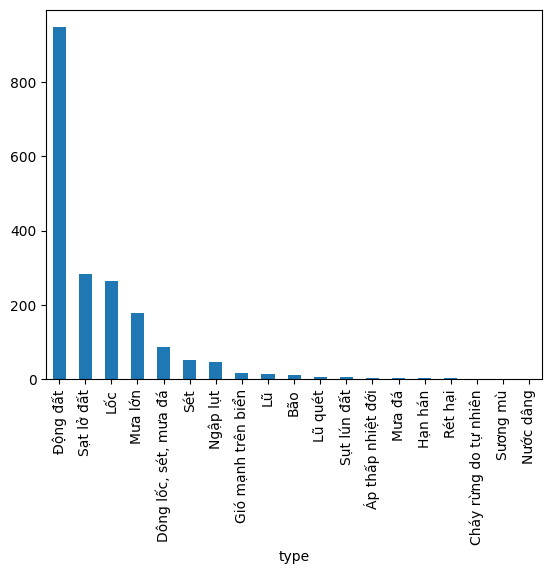

In [41]:
import matplotlib.pyplot as plt
import numpy as np

count_by_type.plot(kind='bar')

<Axes: xlabel='province'>

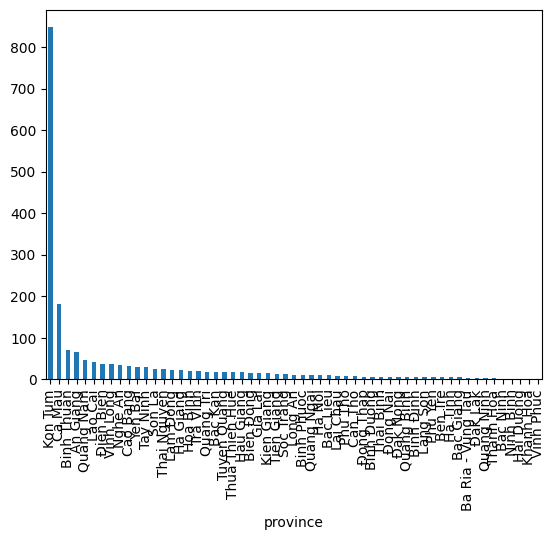

In [ ]:
count_by_prov = df['province'].value_counts()

fig, ax = plt.subplot()


/tmp/ipykernel_2978/3009686287.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['year', 'type']).size().unstack(fill_value=0)


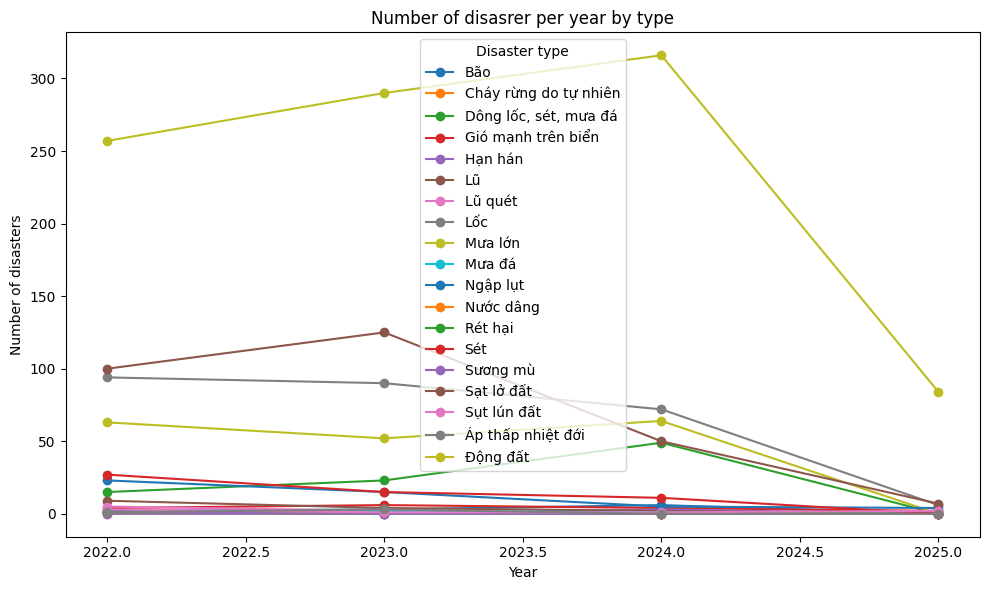

In [61]:


# 2. Extract year from 'time_start' column
df['year'] = pd.to_datetime(df['time_start']).dt.year

# 3. Group data: count number of disasters by type and year
def plot_type_year(df):
    counts = df.groupby(['year', 'type']).size().unstack(fill_value=0)

    # # 4. Plot
    # plt.figure(figsize=(10, 6))
    # for disaster_type in counts.columns:
    #     plt.plot(counts.index, counts[disaster_type], marker='o', label=disaster_type)

    # # 5. Customize the plot
    # plt.xlabel("Year")
    # plt.ylabel("Number of Disasters")
    # plt.title("Number of Disasters per Year by Type")
    # plt.legend(title="Disaster Type")
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()

    plt.figure(figsize=(10, 6))
    for disaster_type in counts.columns:
        plt.plot(counts.index, counts[disaster_type], marker = 'o', label = disaster_type)

    plt.xlabel("Year")
    plt.ylabel("Number of disasters")
    plt.title("Number of disasrer per year by type")
    plt.legend(title="Disaster type")
    plt.tight_layout()
    plt.show()

plot_type_year(df)


In [56]:
df['year'].unique()

array([2022, 1899, 2023, 2024, 2025], dtype=int32)

In [57]:
df[df['year'] == 1899]

,name,time_start,lon,lat,level,type,province,year
76,Lốc tại Cà Mau,1899-12-24,104.819054,8.870442,0,Lốc,Ca Mau,1899


In [58]:
df.drop(df[df.year < 2022].index, inplace=True)

In [60]:
df['year'].unique()

array([2022, 2023, 2024, 2025], dtype=int32)